<a href="https://colab.research.google.com/github/GUC-DM/w23-mini-project-2-mariam-haggagt02-reem-khaledt02/blob/main/Copy_of_Classification_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:Mariem Haggag

ID: 52-11236

Tutorial: T-02

---

Name: Reem Khaled

ID: 52-2002

Tutorial:T-02

---

Name:

ID:

Tutorial:

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/telecom_churn.csv')

df.head()

<ipython-input-1-42697d995335>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

In [2]:
df.info() # gets all the information about the dataset( the no of columns, the name of the columns, the amount of non null rows and the data type of each column) useful to explore the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

In [3]:
pd.set_option("display.float_format", "{:.2f}".format) # this controls the display of float number to be displayed with two deimal figures after as to normaliza the data and then the df. describe gets the
df.describe()# this provides important information about the numerical columns in the data set ( information such as count, mean, standard deviation ,minimum, maximum and the quartiles)

,SeniorCitizen,tenure
count,7032.00,7032.00
mean,0.16,32.42
std,0.37,24.55
min,0.00,1.00
25%,0.00,9.00
50%,0.00,29.00
75%,0.00,55.00
max,1.00,72.00


In [4]:
df.isnull().sum()# provides the sum of null values in each column

customerID           56
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        852
Churn                 0
dtype: int64

In [5]:
for column in df.columns: #prints the unique values in each column and ignores redundancy
    print(f"{column} : {df[column].unique()}")
    print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transf

In [6]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}") # prints the number of unique values in each column so that if a column consists of only unique values then we should drop it (as it doesn't affect the dataset or the relationship)
    print("==========================================================") # based on this we know we will drop customer id as it all consists of unique values and does not add value to the data and we did not drop any other columns as they do not have a single value and no just unique values columns

customerID: Number of unique values 6976
gender: Number of unique values 2
SeniorCitizen: Number of unique values 2
Partner: Number of unique values 2
Dependents: Number of unique values 2
tenure: Number of unique values 72
PhoneService: Number of unique values 2
MultipleLines: Number of unique values 3
InternetService: Number of unique values 3
OnlineSecurity: Number of unique values 3
OnlineBackup: Number of unique values 3
DeviceProtection: Number of unique values 3
TechSupport: Number of unique values 3
StreamingTV: Number of unique values 3
StreamingMovies: Number of unique values 3
Contract: Number of unique values 3
PaperlessBilling: Number of unique values 2
PaymentMethod: Number of unique values 4
MonthlyCharges: Number of unique values 1584
TotalCharges: Number of unique values 5783
Churn: Number of unique values 2


## Data Cleaning

In [7]:
df.drop(['customerID'], axis="columns", inplace=True) # we dropped customer id as it solely consists of unique values as they do not add value to the data

In [8]:
print(df.columns) # we wanted to make sure that the column was dropped so we printed all the columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [9]:
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('/m', '') # MonthlyCharges is an integer that was inserted in the form of an object so we wanted to remove the /m before we can change it into an int( its correct form)

In [10]:
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('$', '').astype(float) # MonthlyCharges is an integer that was inserted in the form of an object so we wanted to remove the $ before we can change it into an int( its correct form)

<ipython-input-10-8dcee3dec220>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('$', '').astype(float) # MonthlyCharges is an integer that was inserted in the form of an object so we wanted to remove the $ before we can change it into an int( its correct form)


In [11]:
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [12]:
df['TotalCharges'] = df['TotalCharges'].str.replace('$', '').astype(float) #Total charges is an integer that was inserted as an object so we wanted to remove the dollar sign and change it into a float number. we changed it into float as to not approximate it if we just use int and change the data

<ipython-input-12-336b38ae49a5>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['TotalCharges'] = df['TotalCharges'].str.replace('$', '').astype(float) #Total charges is an integer that was inserted as an object so we wanted to remove the dollar sign and change it into a float number. we changed it into float as to not approximate it if we just use int and change the data


In [13]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'] * df['tenure']) #we discovered that the total charges is equal to the monthly charges multiplied by the subscription tenure and we wanted to be as accurate as possible so we avoided filling the null values with the mean as it is a numerical column and instead used this equation to properly estimate the total charges and be more accurate

This code fills missing values in the "TotalCharges" column with the product of "MonthlyCharges" and "tenure" columns. It addresses null values by estimating the total charges for each customer based on their monthly charge and subscription tenure.

In [14]:
df['TotalCharges'].isnull().sum() # gets null value  making sure that the null vlues are replaced and no null values left

0

In [15]:
categorical_col = []
for column in df.columns: # we wanted to make a list to put the categorical columnns in as to be used later in the visualization and to have a list of categorical columns instead of looping on the whole dataset each and every time as this would be inefficient
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [16]:
df['Contract'] = pd.Categorical(df['Contract'], # contract is an ordinal categorical attribute so we had to specify it so that we can compare using < and> if needed, however our main aim of this was to specify that this is categorigal ordinal column
                                      categories=['Month-to-month' , 'One year', 'Two year'],
                                      ordered=True)
df['Contract']

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7027          One year
7028          One year
7029    Month-to-month
7030    Month-to-month
7031          Two year
Name: Contract, Length: 7032, dtype: category
Categories (3, object): ['Month-to-month' < 'One year' < 'Two year']

In [17]:
df['Contract'].unique() #checking that it is detected that the contract is an ordinal column

['Month-to-month', 'One year', 'Two year']
Categories (3, object): ['Month-to-month' < 'One year' < 'Two year']

In [18]:
df['Churn'] = df['Churn'].astype('category').cat.codes #we will encode the Churn into its numerical equivelant so that we can use it in correlation matrix and plots and in visualizationn
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int8

## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

In [19]:
df1= df.copy() # created a copy of the data as to not encode the data in the original data set and turn it all to numerical categories

In [20]:
df1['gender'] = df1['gender'].astype('category').cat.codes
df1['gender'] # we wanted to label encode every single categorical column so that we can generate a heat map as heat maps work only numerical columns and we wanted to visualize the relation

0       0
1       1
2       1
3       1
4       0
       ..
7027    1
7028    0
7029    0
7030    1
7031    1
Name: gender, Length: 7032, dtype: int8

In [21]:
df1['Partner'] = df1['Partner'].astype('category').cat.codes
df1['Partner'] # we wanted to label encode every single categorical column so that we can generate a heat map as heat maps work only numerical columns and we wanted to visualize the relation

0       1
1       0
2       0
3       0
4       0
       ..
7027    1
7028    1
7029    1
7030    1
7031    0
Name: Partner, Length: 7032, dtype: int8

In [22]:
df1['Dependents'] = df1['Dependents'].astype('category').cat.codes
df1['Dependents'] # we wanted to label encode every single categorical column so that we can generate a heat map as heat maps work only numerical columns and we wanted to visualize the relation

0       0
1       0
2       0
3       0
4       0
       ..
7027    1
7028    1
7029    1
7030    0
7031    0
Name: Dependents, Length: 7032, dtype: int8

In [23]:
df1['PhoneService'] = df1['PhoneService'].astype('category').cat.codes
df1['PhoneService'] # we wanted to label encode every single categorical column so that we can generate a heat map as heat maps work only numerical columns and we wanted to visualize the relation

0       0
1       1
2       1
3       0
4       1
       ..
7027    1
7028    1
7029    0
7030    1
7031    1
Name: PhoneService, Length: 7032, dtype: int8

In [24]:
df1['MultipleLines'] = df1['MultipleLines'].astype('category').cat.codes
df1['MultipleLines'] # we wanted to label encode every single categorical column so that we can generate a heat map as heat maps work only numerical columns and we wanted to visualize the relation

0       1
1       0
2       0
3       1
4       0
       ..
7027    2
7028    2
7029    1
7030    2
7031    0
Name: MultipleLines, Length: 7032, dtype: int8

In [25]:
df1['InternetService'] = df1['InternetService'].astype('category').cat.codes
df1['InternetService'] # we wanted to label encode every single categorical column so that we can generate a heat map as heat maps work only numerical columns and we wanted to visualize the relation

0       0
1       0
2       0
3       0
4       1
       ..
7027    0
7028    1
7029    0
7030    1
7031    1
Name: InternetService, Length: 7032, dtype: int8

In [26]:
df1['OnlineSecurity'] = df1['OnlineSecurity'].astype('category').cat.codes
df1['OnlineSecurity'] # we wanted to label encode every single categorical column so that we can generate a heat map as heat maps work only numerical columns and we wanted to visualize the relation

0       0
1       2
2       2
3       2
4       0
       ..
7027    2
7028    0
7029    2
7030    0
7031    2
Name: OnlineSecurity, Length: 7032, dtype: int8

In [27]:
df1['OnlineBackup'] = df1['OnlineBackup'].astype('category').cat.codes
df1['OnlineBackup'] # we wanted to label encode every single categorical column so that we can generate a heat map as heat maps work only numerical columns and we wanted to visualize the relation

0       2
1       0
2       2
3       0
4       0
       ..
7027    0
7028    2
7029    0
7030    0
7031    0
Name: OnlineBackup, Length: 7032, dtype: int8

In [28]:
df1['DeviceProtection'] = df1['DeviceProtection'].astype('category').cat.codes
df1['DeviceProtection'] # we wanted to label encode every single categorical column so that we can generate a heat map as heat maps work only numerical columns and we wanted to visualize the relation

0       0
1       2
2       0
3       2
4       0
       ..
7027    2
7028    2
7029    0
7030    0
7031    2
Name: DeviceProtection, Length: 7032, dtype: int8

In [29]:
df1['TechSupport'] = df1['TechSupport'].astype('category').cat.codes
df1['TechSupport'] # we wanted to label encode every single categorical column so that we can generate a heat map as heat maps work only numerical columns and we wanted to visualize the relation

0       0
1       0
2       0
3       2
4       0
       ..
7027    2
7028    0
7029    0
7030    0
7031    2
Name: TechSupport, Length: 7032, dtype: int8

In [30]:
df1['StreamingTV'] = df1['StreamingTV'].astype('category').cat.codes
df1['StreamingTV']# we wanted to label encode every single categorical column so that we can generate a heat map as heat maps work only numerical columns and we wanted to visualize the relation

0       0
1       0
2       0
3       0
4       0
       ..
7027    2
7028    2
7029    0
7030    0
7031    2
Name: StreamingTV, Length: 7032, dtype: int8

In [31]:
df1['StreamingMovies'] = df1['StreamingTV'].astype('category').cat.codes
df1['StreamingMovies']# we wanted to label encode every single categorical column so that we can generate a heat map as heat maps work only numerical columns and we wanted to visualize the relation

0       0
1       0
2       0
3       0
4       0
       ..
7027    2
7028    2
7029    0
7030    0
7031    2
Name: StreamingMovies, Length: 7032, dtype: int8

In [32]:
df1['Contract'] = df1['Contract'].astype('category').cat.codes
df1['Contract']# we wanted to label encode every single categorical column so that we can generate a heat map as heat maps work only numerical columns and we wanted to visualize the relation

0       0
1       1
2       0
3       1
4       0
       ..
7027    1
7028    1
7029    0
7030    0
7031    2
Name: Contract, Length: 7032, dtype: int8

In [33]:
df1['PaperlessBilling'] = df1['PaperlessBilling'].astype('category').cat.codes
df1['PaperlessBilling']# we wanted to label encode every single categorical column so that we can generate a heat map as heat maps work only numerical columns and we wanted to visualize the relation

0       1
1       0
2       1
3       0
4       1
       ..
7027    1
7028    1
7029    1
7030    1
7031    1
Name: PaperlessBilling, Length: 7032, dtype: int8

In [34]:
df1['PaymentMethod'] = df1['PaymentMethod'].astype('category').cat.codes
df1['PaymentMethod']# we wanted to label encode every single categorical column so that we can generate a heat map as heat maps work only numerical columns and we wanted to visualize the relation

0       2
1       3
2       3
3       0
4       2
       ..
7027    3
7028    1
7029    2
7030    3
7031    0
Name: PaymentMethod, Length: 7032, dtype: int8

In [35]:
corr = df1.corr() # shows the relation matrix to show the relationship between   the attributes after transforming it to numerical values
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.00,-0.00,-0.00,0.01,0.01,-0.01,-0.01,-0.00,-0.01,-0.01,0.00,-0.01,-0.01,-0.01,0.00,-0.01,0.02,-0.01,0.00,-0.01
SeniorCitizen,-0.00,1.00,0.02,-0.21,0.02,0.01,0.15,-0.03,-0.13,-0.01,-0.02,-0.15,0.03,0.03,-0.14,0.16,-0.04,0.22,0.10,0.15
Partner,-0.00,0.02,1.00,0.45,0.38,0.02,0.14,0.00,0.15,0.15,0.17,0.13,0.14,0.14,0.29,-0.01,-0.16,0.10,0.32,-0.15
Dependents,0.01,-0.21,0.45,1.00,0.16,-0.00,-0.02,0.04,0.15,0.09,0.08,0.13,0.05,0.05,0.24,-0.11,-0.04,-0.11,0.06,-0.16
tenure,0.01,0.02,0.38,0.16,1.00,0.01,0.34,-0.03,0.33,0.37,0.37,0.32,0.29,0.29,0.68,0.00,-0.37,0.25,0.83,-0.35
PhoneService,-0.01,0.01,0.02,-0.00,0.01,1.00,-0.02,0.39,-0.01,0.02,0.00,-0.02,0.06,0.06,0.00,0.02,-0.01,0.25,0.11,0.01
MultipleLines,-0.01,0.15,0.14,-0.02,0.34,-0.02,1.00,-0.11,0.01,0.12,0.12,0.01,0.18,0.18,0.11,0.17,-0.18,0.43,0.45,0.04
InternetService,-0.00,-0.03,0.00,0.04,-0.03,0.39,-0.11,1.00,-0.03,0.04,0.05,-0.03,0.11,0.11,0.10,-0.14,0.08,-0.32,-0.18,-0.05
OnlineSecurity,-0.01,-0.13,0.15,0.15,0.33,-0.01,0.01,-0.03,1.00,0.18,0.18,0.28,0.04,0.04,0.37,-0.16,-0.10,-0.05,0.25,-0.29
OnlineBackup,-0.01,-0.01,0.15,0.09,0.37,0.02,0.12,0.04,0.18,1.00,0.19,0.20,0.15,0.15,0.28,-0.01,-0.13,0.12,0.38,-0.20


In [36]:
corr['Churn'].sort_values(ascending=False, key=lambda x: x.abs()) #sorts the values to show the relation between churn and other attributes from highest relation to lowest relation

Churn               1.00
Contract           -0.40
tenure             -0.35
OnlineSecurity     -0.29
TechSupport        -0.28
TotalCharges       -0.20
OnlineBackup       -0.20
MonthlyCharges      0.19
PaperlessBilling    0.19
DeviceProtection   -0.18
Dependents         -0.16
SeniorCitizen       0.15
Partner            -0.15
PaymentMethod       0.11
InternetService    -0.05
MultipleLines       0.04
StreamingTV        -0.04
StreamingMovies    -0.04
PhoneService        0.01
gender             -0.01
Name: Churn, dtype: float64

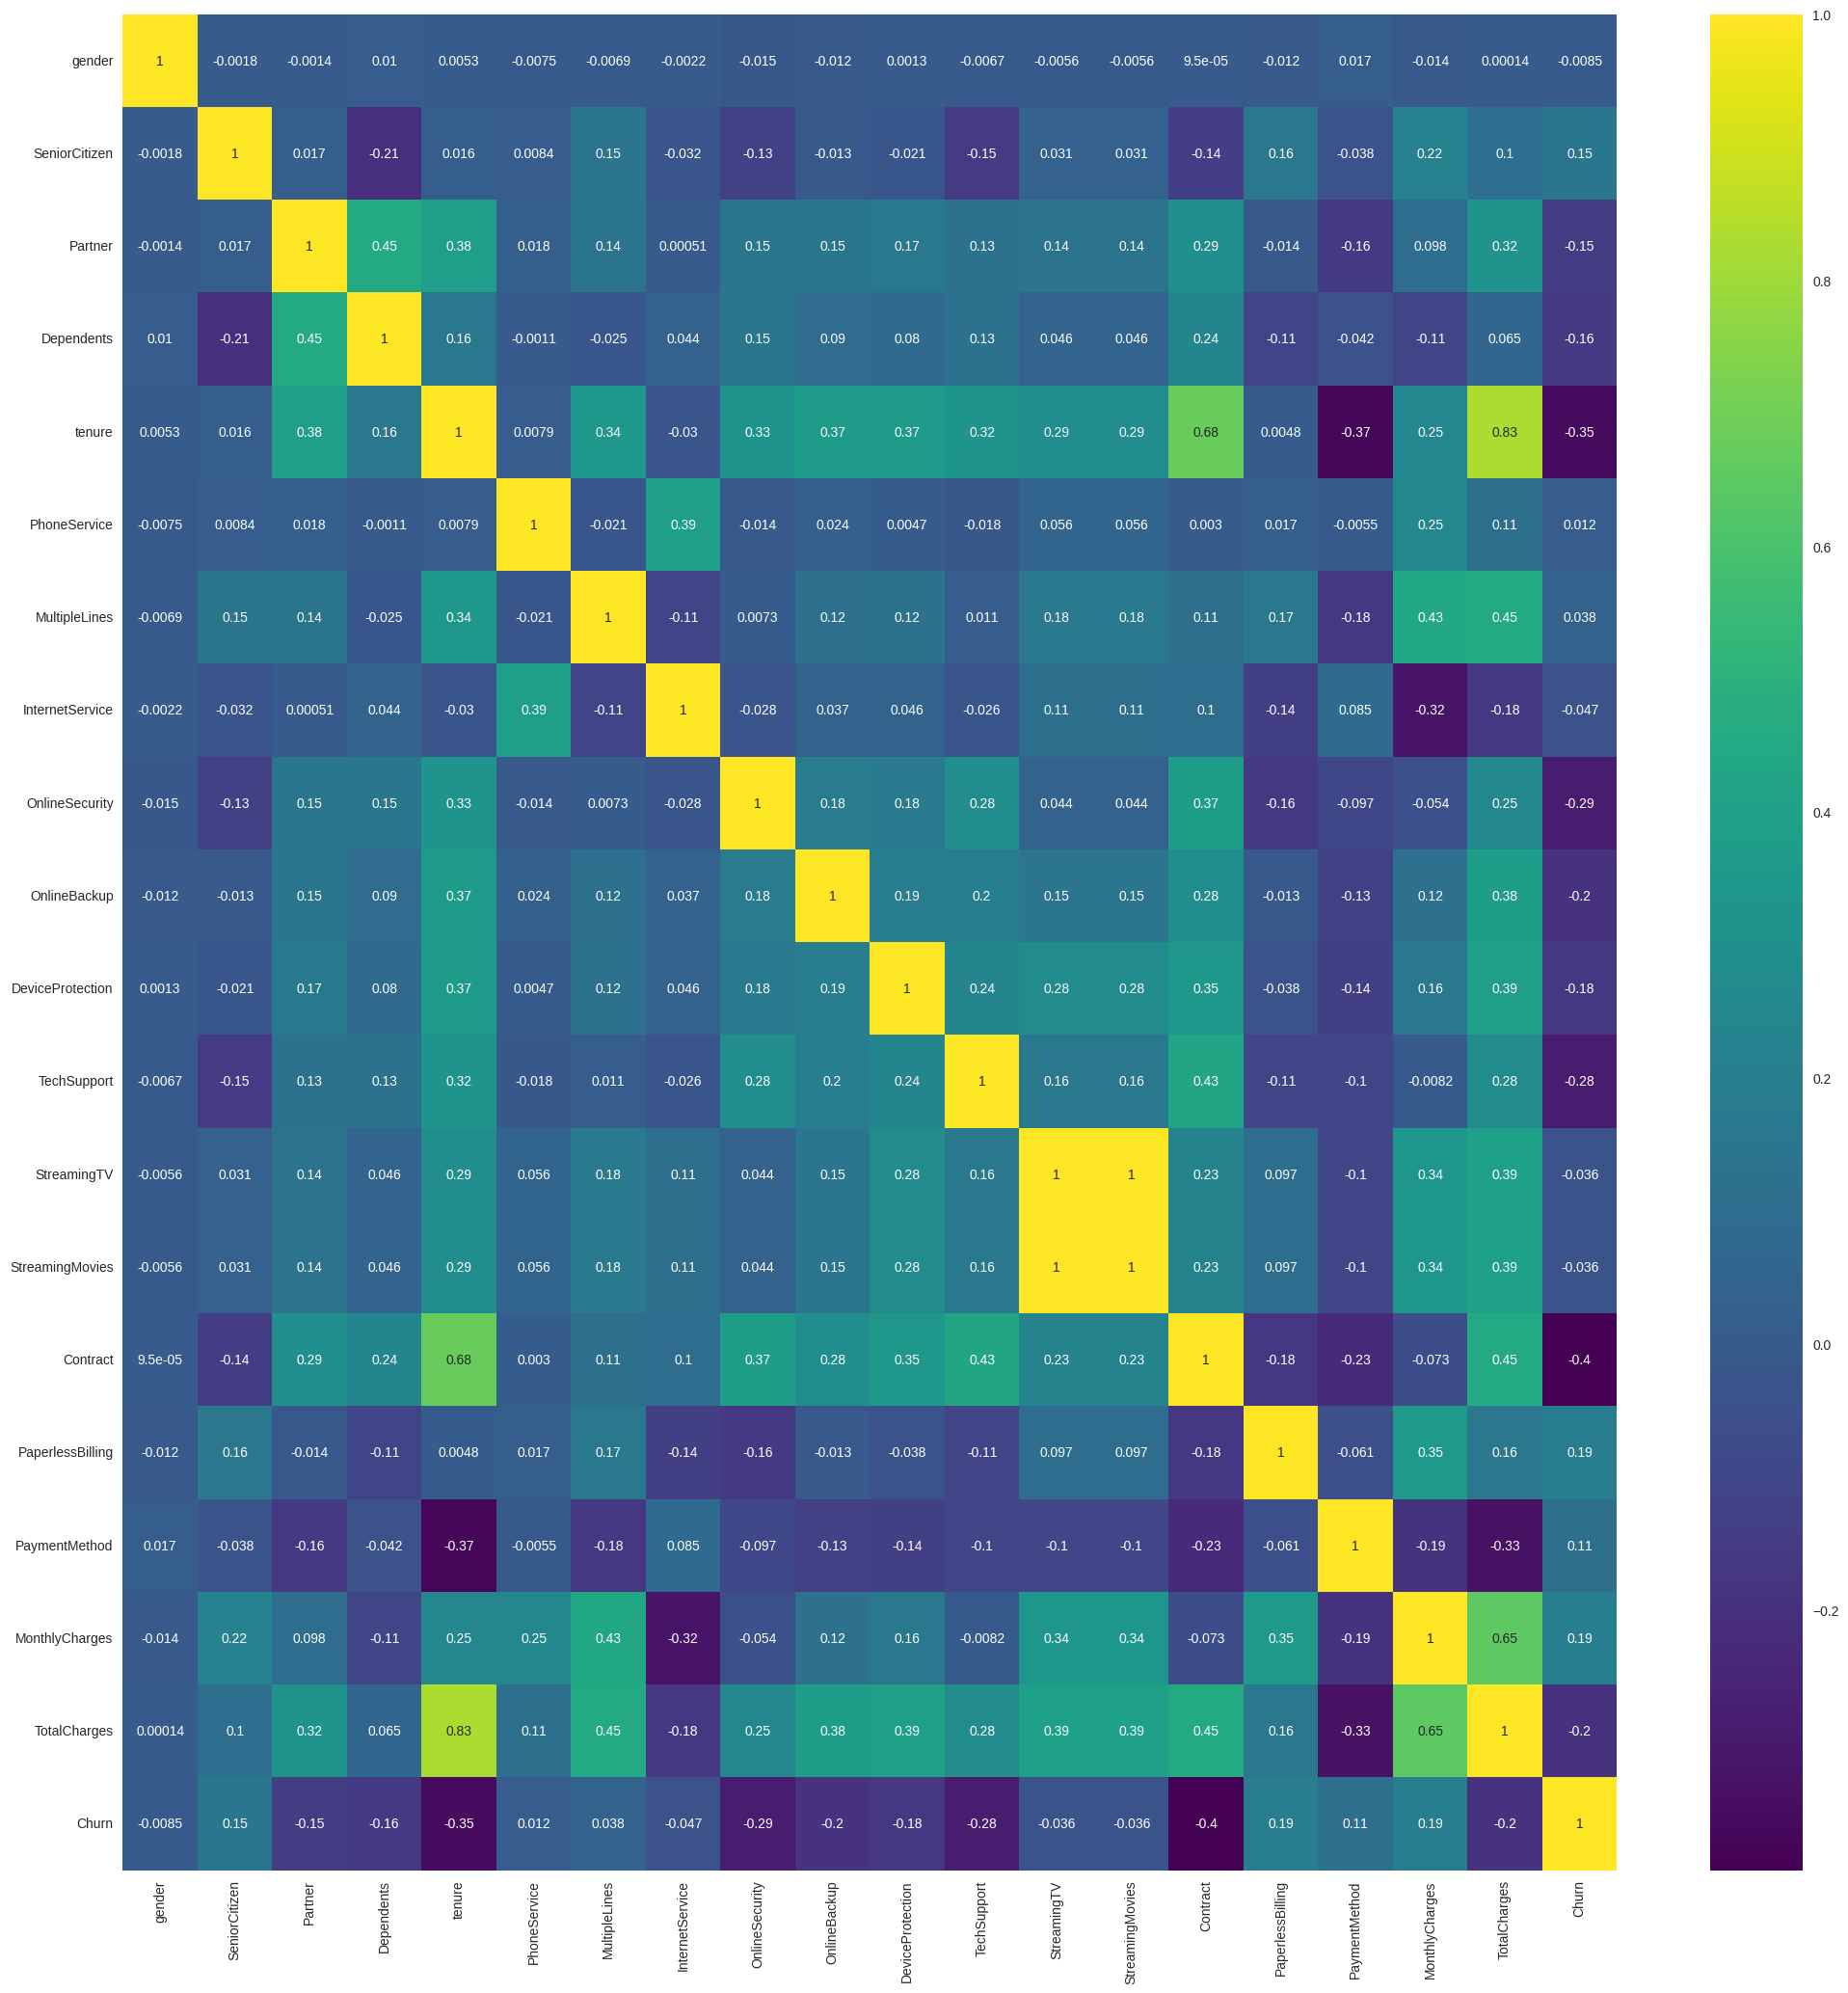

In [37]:

fig, ax = plt.subplots(figsize=(25, 25)) # visualizes the heatmap as to show correlation as heatmap only works on numerical values
sns.heatmap(corr, annot=True, cmap='viridis', ax=ax)
plt.show()

**Answer for Q1**: The most correlated attribute is contract followed by tenure


**Q2: Which payment method has the highest churn rate?**

**Visualization**

Text(0.5, 0, 'Churn')

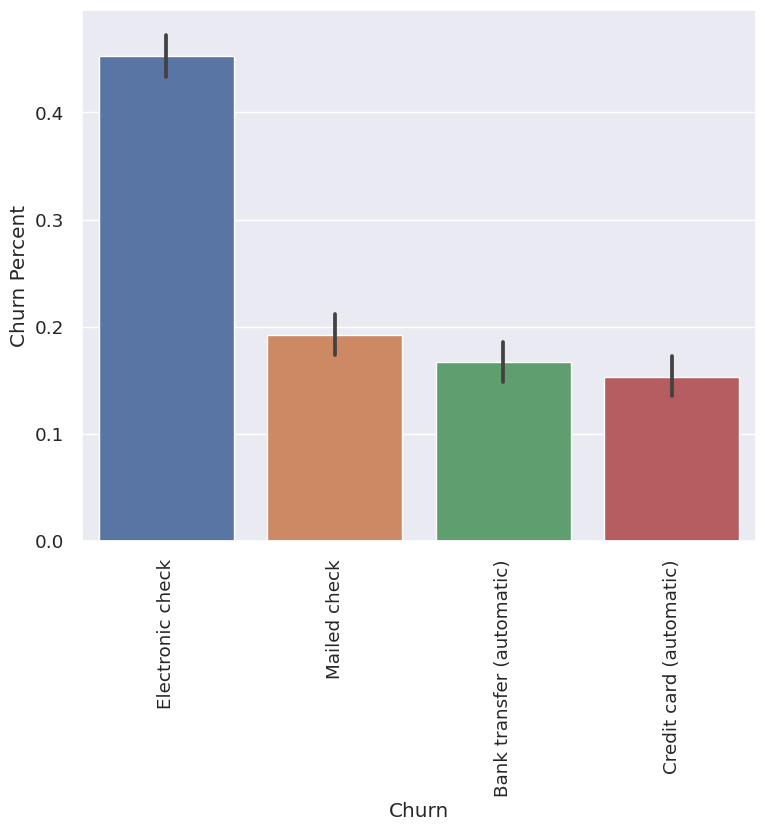

In [38]:
sns.set(font_scale=1.2) # adjusts font
plt.figure(figsize=(40, 40)) # conrols dimensions
plt.subplot(5, 4, 6)
g = sns.barplot(x='PaymentMethod', y='Churn', data=df)# creates a barplot that shows relationship between payment method and Churn which are categorical so barplot is used
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.ylabel('Churn Percent')
plt.xlabel(f'{column}')

**Answer for Q2**: Electronic Check has the highest churn Percent

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

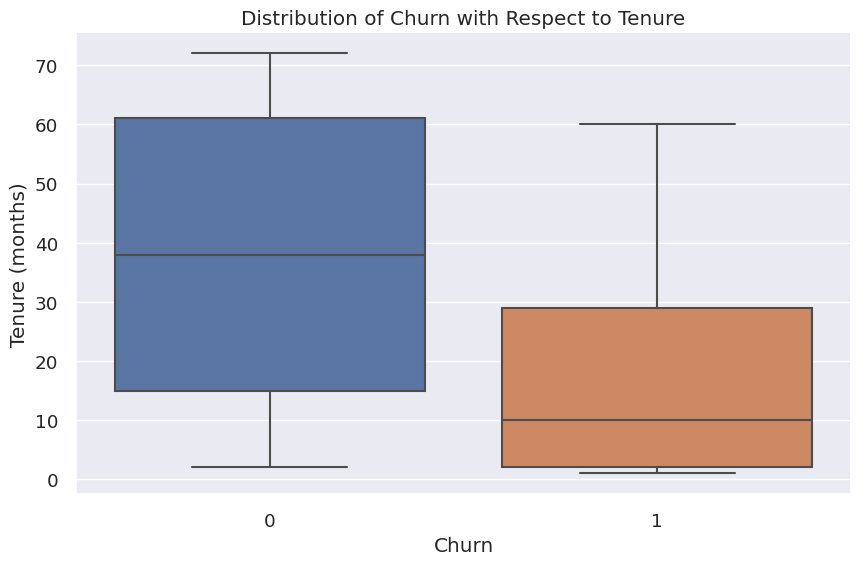

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

# Set showfliers to False to exclude outliers and specify the percentiles
sns.boxplot(x='Churn', y='tenure', data=df, showfliers=False, whis=[5, 95])

plt.title('Distribution of Churn with Respect to Tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')
plt.show() #we used box plot as to show the distribution

**Answer for Q3**: At the 25% quartile the customer churn was 2, at the50% the customer churn was 10 months and at the 75% the customer churn was about 28 months. Customers commonly churn after 10 months as it is the median.



## Data Preparation for Modelling

In [40]:
df_encoded = df.copy()

In [41]:
df_encoded['Contract'] = df_encoded['Contract'].cat.codes
df_encoded['Contract'] #scikit-learn does not support categorical data so it much be encoded and switched to numeric

0       0
1       1
2       0
3       1
4       0
       ..
7027    1
7028    1
7029    0
7030    0
7031    2
Name: Contract, Length: 7032, dtype: int8

In [42]:
categorical_col.remove('Contract') #contract is no longer a categorical variable so we remove it from the categorical features list that we did

In [43]:
categorical_col.remove('Churn')

In [44]:
df_encoded = pd.get_dummies(df_encoded, columns=categorical_col)
df_encoded.info() # we are encoding all the binary columns because we need only one value in the node to do the split ,when a value is yes so its definetly not no so one column is enough

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 44 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   Contract                                 7032 non-null   int8   
 3   MonthlyCharges                           7032 non-null   float64
 4   TotalCharges                             7032 non-null   float64
 5   Churn                                    7032 non-null   int8   
 6   gender_Female                            7032 non-null   uint8  
 7   gender_Male                              7032 non-null   uint8  
 8   Partner_No                               7032 non-null   uint8  
 9   Partner_Yes                              7032 non-null   uint8  
 10  Dependents_No                            7032 no

In [45]:
df_encoded.drop(['Partner_No', 'gender_Female','Dependents_No','PhoneService_No','MultipleLines_No','PaperlessBilling_No' ], axis='columns', inplace=True)
df_encoded.columns #when a cvalue is yes it is for sure not no so these are extra columns that we do not need,these are considered redundunt binary columns so we dropped them

Index(['SeniorCitizen', 'tenure', 'Contract', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electr

## Modelling

In [46]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)#data is split into test set and train set because the model has to be tested on data that it has not seen it before in order to be able to calculate the model accuracy

In [47]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

This code trains a decision tree model to make predictions based on given features and corresponding labels. It's like teaching the computer to learn patterns from a set of examples (training data) so it can later predict outcomes for new, unseen cases. The random_state=42 ensures that the training process is reproducible. Once trained, the model can be used to predict outcomes for new data.

### Tree Visualization

In [57]:
import graphviz
from sklearn.tree import export_graphviz # we visualize data for more clarity
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph
# alternatively, to export:
#graph.render('Churn')

Using the left most branch, we concluded that these are the conditions that increase the chance of a customer leaving: gini=0.0 , samples = 1, values=[0,1], class= yes And Monthly charges<= 19.025, gini= 0.225, samples=417, value[363,54] , class= No And tenure<=9.5, gini=0.28, samples= 625, value=[520,105], class=No And MultipleLines_No phone service ≤ 0.5, gini = 0.322 ,samples = 812, value = [648, 164], class = No And tenure ≤ 3.5 , gini = 0.406, samples = 1215 value = [871, 344] ,class = No And tenure ≤ 15.5 gini = 0.493 samples = 1474 value = [652, 822] class = Yes And InternetService_Fiber optic ≤ 0.5 gini = 0.491 ,samples = 2689,value = [1523, 1166],class = No And Contract ≤ 0.5, gini = 0.39, samples = 4922 ,value = [3614, 1308], class = No . This is also the shortest path as it ends at a leaf and goes through the shortest route.

it uses the export_graphviz function to generate a description of the tree's structure, including features and classes, in a format that Graphviz understands. The resulting visualization helps us humans understand how the model makes predictions.

## Evaluation

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True): #the feature matrices for both training and testing sets (X_train and X_test), the corresponding target variables (y_train and y_test), and a boolean parameter train.


    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")  #this function is a helper method that we will call in order to evaluate the model performance

This function is designed to provide a quick and comprehensive summary of a classifier's performance, helping you understand how well it is doing in terms of accuracy and its ability to correctly classify instances across different classes. The classification report breaks down the precision, recall, and F1-score for each class, while the confusion matrix provides a detailed breakdown of the true positive, true negative, false positive, and false negative predictions.

In [50]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False) #the above method is called in order to print out the train test result and the test set result where we provide the model with a data that the model has not seen before tp evaluate accuracy since classification is supervised

Train Result:
Accuracy Score: 99.86%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    1.00    1.00      1.00       1.00          1.00
recall       1.00    1.00      1.00       1.00          1.00
f1-score     1.00    1.00      1.00       1.00          1.00
support   3614.00 1308.00      1.00    4922.00       4922.00
_______________________________________________
Confusion Matrix: 
 [[3613    1]
 [   6 1302]]

Test Result:
Accuracy Score: 73.03%
_______________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.82   0.49      0.73       0.66          0.73
recall       0.81   0.52      0.73       0.66          0.73
f1-score     0.81   0.50      0.73       0.66          0.73
support   1549.00 561.00      0.73    2110.00       2110.00
_______________________________________________
Confusion Matrix: 
 [[1252  297]
 [ 

Notice that after the accuracy decreased at the test results and is lower than of the training results as the computer is not used to this data set and is trying and applying what it learned from the training to a new dataset , however, the training dataset is known. a new dataset can provide this lower accuracy.

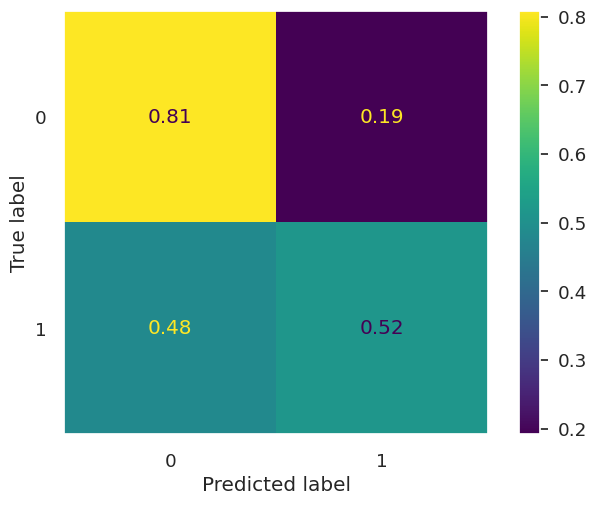

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, tree_clf.predict(X_test), labels=tree_clf.classes_,normalize='true') #For the given confusion matrix in the training set, it reflects a perfect predictive performance with an accuracy of 100%. The model accurately identifies all instances of non-defaulters (class 0) and defaulters (class 1), resulting in 853 true positives and 176 true negatives. As shown, there are no instances misclassified, with a complete absence of false positives or false negatives. This indicates a positive performance on the training set, correlated with a potential risk of overfitting to this specific dataset.
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_clf.classes_) #normalize= 'true',normalizes the matrix to show percentages instead of counts.
disp.plot()
plt.grid(False)

the code helps visualize how well the decision tree model is performing on the testing data, particularly in terms of true positives, true negatives, false positives, and false negatives. It provides a clearer understanding of the model's strengths and potential weaknesses in classification.

In [52]:
from sklearn.metrics import f1_score, precision_score, recall_score

pred = tree_clf.predict(X_test)

print('Precision: ',precision_score(y_test,pred))
print('=======================================')
print('Recall: ',recall_score(y_test,pred))
print('=======================================')
print('F1_score: ',f1_score(y_test,pred))

Precision:  0.4931740614334471
Recall:  0.5151515151515151
F1_score:  0.5039232781168266


 The best metrics is Precision as we want to predict all the customers that churned. The dataset contains imbalanced classes and our main focus is on people who churned rather than people who did not and therefore, percision is important. Precision tells you how many of the predicted positive instances are actually positive. Recall tells you how many of the actual positive instances were predicted correctly.F1-Score is a balance between precision and recall considering false positives and false negatives.F1 score can also be used as to balance all the imbalances we have and because it is a balance between precision and recall considering false positives and false negatives

## Bonus (Optional)

In [71]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train, y_train)
print("Decision Tree Classifier:")
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)
print("\nRandom Forest Classifier:")
print_score(random_forest_classifier, X_train, y_train, X_test, y_test, train=False)

Decision Tree Classifier:
Test Result:
Accuracy Score: 58.48%
_______________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.84   0.36      0.58       0.60          0.71
recall       0.54   0.71      0.58       0.63          0.58
f1-score     0.66   0.48      0.58       0.57          0.61
support   1549.00 561.00      0.58    2110.00       2110.00
_______________________________________________
Confusion Matrix: 
 [[835 714]
 [162 399]]


Random Forest Classifier:
Test Result:
Accuracy Score: 78.58%
_______________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.83   0.62      0.79       0.73          0.77
recall       0.89   0.49      0.79       0.69          0.79
f1-score     0.86   0.55      0.79       0.70          0.78
support   1549.00 561.00      0.79    2110.00       2110.00
_________________________________________

In [72]:
from sklearn.metrics import f1_score, precision_score, recall_score

pred_tree = tree_clf.predict(X_test)
print ('Decision Tree Classifier:')
print('Precision: ',precision_score(y_test, pred_tree))
print('Recall: ', recall_score(y_test, pred_tree))
print('F1_score: ', f1_score(y_test, pred_tree))

pred_rfc = random_forest_classifier.predict(X_test)
print ('Random Forest Classifier:')
print('Precision: ', precision_score(y_test, pred_rfc))
print('Recall: ', recall_score(y_test, pred_rfc))
print('F1_score: ', f1_score(y_test, pred_rfc))

Decision Tree Classifier:
Precision:  0.3584905660377358
Recall:  0.7112299465240641
F1_score:  0.4767025089605734
Random Forest Classifier:
Precision:  0.6230248306997742
Recall:  0.4919786096256685
F1_score:  0.549800796812749


The decision tree was more accurate with a higher rate of precision and recall and f1 score so better predictions as  Precision tells you how many of the predicted positive instances are actually positive. Recall tells you how many of the actual positive instances were predicted correctly.F1-Score is a balance between precision and recall considering false positives and false negatives and is higher with the decision tree.